In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
!nvidia-smi

Thu Apr  8 19:09:19 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8    26W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
!pip install tensorflow-gpu

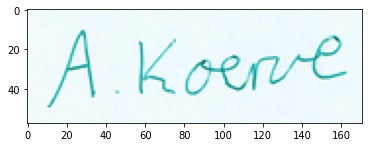

In [4]:
import matplotlib.pyplot as plt
img = plt.imread('/content/drive/MyDrive/dataset/input2/sample_Signature/sample_Signature/forged/NFI-00101014.png')
plt.imshow(img)

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


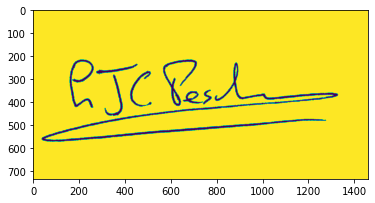

In [6]:
img1 = plt.imread('/content/drive/MyDrive/dataset/input2/sample_Signature/sample_Signature/genuine/NFI-00101001.png')
plt.imshow(img1)

In [7]:
import glob
gen = [glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/*.*'),
       glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset2/real/*.*'),
       glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset3/real/*.*'),
       glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset4/real1/*.*')]
                 
forg = [glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/forge/*.*'),
        glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset2/forge/*.*'),
        glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset3/forge/*.*'),
        glob.glob('/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset4/forge/*.*')]
print(gen)

[['/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00602006.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/01004010.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00600006.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00900009.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00300003.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00200002.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/01000010.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00402004.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/01201012.png', '/content/drive/MyDrive/dataset/input2/Dataset_Signature_Final/Dataset/dataset1/real/00202002.png'

In [9]:
import glob
import keras
import cv2

# gen = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/genuine/*.*")
# forg = glob.glob("../input/handwritten-signatures/sample_Signature/sample_Signature/forged/*.*")
# ../input/handwritten-signatures/sample_Signature/sample_Signature/forged/NFI-00101014.png

train_data = []
train_labels = []

test_data = []
test_labels = []

for data in range(len(gen)):
    for i in gen[data]:
        if data == 3:
            image = cv2.imread(i)
            
            
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            
            test_data.append(image)
            test_labels.append(0)
        else:
            image = cv2.imread(i)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(0) #genuine = 0
        
for data in range(len(forg)):
    for j in forg[data]:
        if data == 3:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            test_data.append(image)
            test_labels.append(1)
        else:
            image = cv2.imread(j)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (224, 224))
            train_data.append(image)
            train_labels.append(1) #forged = 1

train_data = np.array(train_data)/255.0
train_labels = np.array(train_labels)

test_data = np.array(test_data)/255.0
test_labels = np.array(test_labels)



In [12]:
train_data = train_data.reshape(-1, 224,224, 3)
test_data = test_data.reshape(-1, 224,224, 3)

In [34]:
from sklearn.utils import shuffle
train_data,train_labels = shuffle(train_data,train_labels)
test_data,test_labels = shuffle(test_data,test_labels)
from keras import applications
from keras.models import Sequential,Model
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix as CM
from keras.optimizers import Adam

base_model = applications.VGG16(weights='imagenet', include_top=False, input_shape=(224,224,3))
base_model.summary()

add_model = Sequential()
add_model.add(Flatten(input_shape=base_model.output_shape[1:]))
add_model.add(Dense(128, activation='relu'))
add_model.add(Dense(2, activation='softmax'))

model = Model(inputs=base_model.input, outputs=add_model(base_model.output)) # Add the last layer

model.compile(optimizer=Adam(lr=0.00001),loss="sparse_categorical_crossentropy",metrics=["accuracy"])

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [35]:
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
earlyStopping = EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=3,
                              verbose=1)

callback_early_stop_reduceLROnPlateau=[earlyStopping]

EPOCHS = 5
BS = 1
progess = model.fit(train_data,train_labels, batch_size=BS,epochs=EPOCHS, callbacks=callback_early_stop_reduceLROnPlateau,validation_split=.05)

Epoch 1/5
513/513 [==============================] - 77s 90ms/step - loss: 0.5986 - accuracy: 0.6293 - val_loss: 0.2002 - val_accuracy: 0.9630
Epoch 2/5
513/513 [==============================] - 46s 90ms/step - loss: 0.0981 - accuracy: 0.9679 - val_loss: 0.0565 - val_accuracy: 0.9630
Epoch 3/5
513/513 [==============================] - 46s 91ms/step - loss: 0.0269 - accuracy: 0.9962 - val_loss: 0.1556 - val_accuracy: 0.9259
Epoch 4/5
513/513 [==============================] - 46s 90ms/step - loss: 0.0298 - accuracy: 0.9889 - val_loss: 0.0205 - val_accuracy: 1.0000
Epoch 5/5
513/513 [==============================] - 46s 91ms/step - loss: 0.0106 - accuracy: 0.9987 - val_loss: 0.0757 - val_accuracy: 0.9630


In [37]:
predictions=model.predict(test_data)
pred=predictions.argmax(axis=1)

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
print(classification_report(test_labels,pred))

              precision    recall  f1-score   support

           0       0.81      0.64      0.72        90
           1       0.70      0.84      0.77        90

    accuracy                           0.74       180
   macro avg       0.75      0.74      0.74       180
weighted avg       0.75      0.74      0.74       180



In [40]:
print(confusion_matrix(test_labels,pred))

[[58 32]
 [14 76]]
